In [ ]:
#!pip install rasterio

In [ ]:
import rasterio
import numpy
import matplotlib.pyplot as plt
from google.colab import drive

filename = '/content/drive/My Drive/merged_image.tif'
with rasterio.open(filename) as src:
    band_red = src.read(3)
with rasterio.open(filename) as src:
    band_nir = src.read(4)

# Do not display error when divided by zero 
numpy.seterr(divide='ignore', invalid='ignore')
ndvi = (band_nir.astype(float) - band_red.astype(float)) / (band_nir + band_red)

In [ ]:
print(numpy.nanmin(ndvi)) 
print(numpy.nanmax(ndvi))

-1.0
1.0


In [ ]:
meta = src.meta
print(meta)

ndvi_dtype = ndvi.dtype
print(ndvi_dtype)

kwargs = meta

kwargs.update(dtype=ndvi_dtype)

kwargs.update(count=1)

# Use rasterio to write new raster file 'data/ndvi.tif':
with rasterio.open('ndvi.tif', 'w', **kwargs) as dst:
        dst.write(ndvi, 1)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 7671, 'height': 7831, 'count': 5, 'crs': CRS.from_epsg(32643), 'transform': Affine(30.0, 0.0, 221085.0,
       0.0, -30.0, 2673915.0)}
float64


In [ ]:
from matplotlib import colors
class MidpointNormalize(colors.Normalize):
   
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
       
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return numpy.ma.masked_array(numpy.interp(value, x, y), numpy.isnan(value))

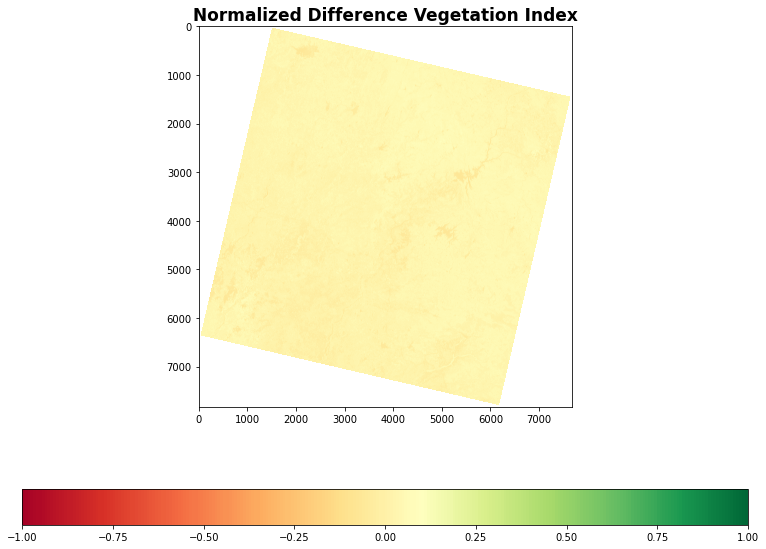

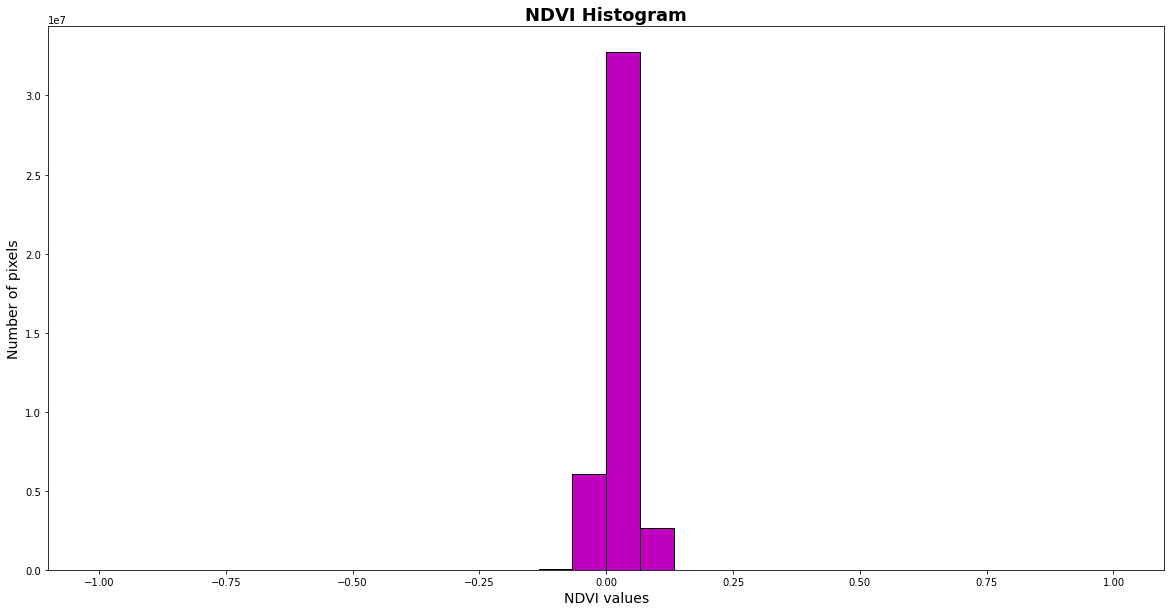

In [ ]:
# Set min/max values from NDVI range for image
min=numpy.nanmin(ndvi)
max=numpy.nanmax(ndvi)

mid=0.1

# Setting color scheme as reference:https://matplotlib.org/users/colormaps.html 
colormap = plt.cm.RdYlGn 
norm = MidpointNormalize(vmin=min, vmax=max, midpoint=mid)
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111)

cbar_plot = ax.imshow(ndvi, cmap=colormap, vmin=min, vmax=max, norm=norm)

ax.axis('on')

# Set a title 
ax.set_title('Normalized Difference Vegetation Index', fontsize=17, fontweight='bold')

cbar = fig.colorbar(cbar_plot, orientation='horizontal', shrink=0.65)

fig.savefig("ndvi-image.png", dpi=200, bbox_inches='tight', pad_inches=0.7)

# let's visualize
plt.show()

fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_subplot(111)

plt.title("NDVI Histogram", fontsize=18, fontweight='bold')
plt.xlabel("NDVI values", fontsize=14)
plt.ylabel("Number of pixels", fontsize=14)

x = ndvi[~numpy.isnan(ndvi)]
color = 'm'
ax.hist(x,bins=30,color=color,histtype='bar', ec='black')

fig2.savefig("ndvi-histogram.png", dpi=200, bbox_inches='tight', pad_inches=0.5)

plt.show()